In [32]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


共分散行列の意味がわからない。

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' % eigen_vals)

Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


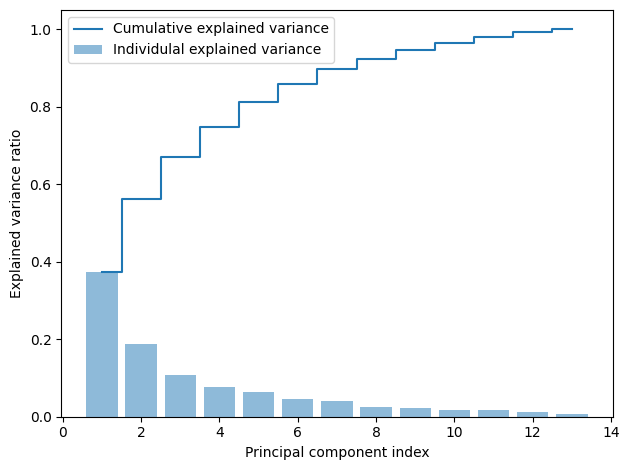

In [35]:
import matplotlib.pyplot as plt
# 固有値を合計
tot = sum(eigen_vals)
var_exp = [(i / tot ) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# 分散説明率の棒グラフを作成
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individulal explained variance')
#　分散説明りつの累積和の階段グラフを作成
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [36]:
# (固有値, 固有ベクトル)のタプルを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# （固有値, 固有ベクトル）のタプルを大きい順で並べ換え
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [37]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


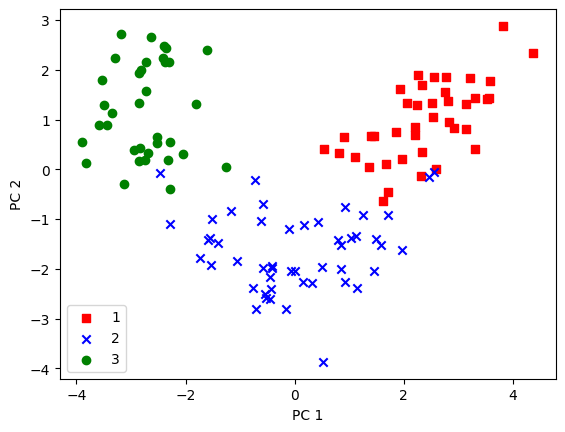

In [38]:
#先ほどのとdotを取ることで、主成分の二次元ベクトルを作成することができる
import numpy as np
import matplotlib.pyplot as plt
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
#クラスラベル、点の色、点の種類の組み合わせからなるリストをプロット
for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

X_train_pca[y_train==l, 0]
X_train_pca[y_train==l, 1]
これは
y_trainがlの時に、どういう処理をしていますか？
/n
ChatGPT

X_train_pca[y_train==l, 0] と X_train_pca[y_train==l, 1] は、それぞれ以下のような処理を行っています。

処理の詳細
y_train == l の部分は、y_train の各要素が l と等しいかどうかを評価する条件式です。この条件式は、ブール値（True または False）の配列を生成します。例えば、y_train が [1, 2, 1, 3, 2] で l が 2 の場合、y_train == l は [False, True, False, False, True] になります。

次に、このブール配列を使って X_train_pca の行をフィルタリングし、対応する主成分（0番目と1番目の列）を取得します。

具体的な例
以下に具体例を示します。


In [39]:
'''
import numpy as np

# 仮のデータ
X_train_pca = np.array([[1.2, 3.4], [2.3, 4.5], [1.5, 3.6], [2.8, 4.7], [2.1, 4.2]])
y_train = np.array([1, 2, 1, 3, 2])

# クラスラベル l = 2
l = 2

# 条件式 y_train == l
condition = (y_train == l)  # [False, True, False, False, True]

# フィルタリングして 0 番目の主成分を取得
X_train_pca[condition, 0]  # [2.3, 2.1]

# フィルタリングして 1 番目の主成分を取得
X_train_pca[condition, 1]  # [4.5, 4.2]
'''

array([4.5, 4.2])


説明
X_train_pca[y_train==l, 0]:

y_train == l が True である行を選び、X_train_pca の第0列（1番目の主成分）を取得します。この場合、[2.3, 2.1] が返されます。
X_train_pca[y_train==l, 1]:

同様に、y_train == l が True である行を選び、X_train_pca の第1列（2番目の主成分）を取得します。この場合、[4.5, 4.2] が返されます。
まとめ
この操作により、クラス l に対応するデータポイントを主成分空間上で取得し、それぞれの主成分（軸）に沿ってプロットするための準備を行っています。これにより、同じクラスのデータポイントを散布図上で色やマーカーを使って視覚的に区別できます。

# PCAをライブラリ実装

In [40]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier , resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリットポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を一次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリットポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにデータ点をプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], label=cl)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
# ロジスティック回帰のインスタンス作成
lr = LogisticRegression(multi_class='ovr', solver='lbfgs', random_state=1)
# 次元削減
X_train_pca = pca.fit_transform(X_train_std)
x_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
# 決定境界をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [124, 5]